# Machine Learning Classification Project:
# Client Product Interest Prediction 

### Contents
1. Introduction
2. Source
3. EDA
4. Data Cleaning and Preparation
5. Training
6. Testing
7. Conclusions

### Introduction: 
When a business seeks to increase revenue, a myriad of strategies can be employed. One technique is to sell more to current clientelle. The advantage of this approach is that the leads are already captured and are in a position of trust in the vendor, and it is therefore not a random cold-calling situation. The challenge, however --and this is not unique to this scenario, but applies in any marketing campaign-- is balancing the time and money needed for the marketing effort vs the actual resultant revenue. Ah, if only there was a way to optimize it! To know which customers would most likely be interested in the product, so that we could market to them directly instead of blanketing the entire client base in the usual hit-and-miss fashion! To reduce the hassle, the headache, the aggravation, the woes! Is there a way to know? Well, in 2021, there is! And it does not involve calling your shaman uncle from New Orleans to do voodoo sourcery. We can just use machine learning.

#### Overarching Goal:
Can we use Machine Learning to predict which customers at this bank would be interested in buying a credit card product based on a set of characteristics? In this project, I analyze the data, prepare it, and build the ML model which will make this prediction. 

#### Defined objectives:
1. Find out which customer is most likely to be interested in buying a product using a machine learning prediction algorithm.
2. Learn what factor is the most influential in determining the likelyhood that a client will be a lead based on the given attributes. 

#### Motivation: 
Assist a business in increasing its profit by enabling the marketing department to more accurately target clients that are most likely to buy, in turn reducing cost and turn-around time. 

### Source:
The dataset is from https://www.kaggle.com/nextbigwhat/analytics-vidhya-job-a-thon-may-2021

********** LICENSE

### EDA

In [63]:
#Import Libraries

import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = [12,5]
warnings.filterwarnings("ignore")

# Multiple Line Output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Load dataset and apply variable name
dataset = pd.read_csv('../Datasets/AnalyticsVidhya-JOB_A_THON-May2021/train_s3TEQDk.csv')

#The original data contains two files, which appear to be a dataset divided in two. Since one is much larger than the other, we'll stick to that one.

In [3]:
#Preliminary examination of dataset / EDA

print('Preview')
dataset
print('-----------------------------------------------------')
print('Shape')
dataset.shape
print('-----------------------------------------------------')
print('Describe')
dataset.describe().T
print('-----------------------------------------------------')
print('Info')
dataset.info()

Preview


,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


-----------------------------------------------------
Shape


(245725, 11)

-----------------------------------------------------
Describe


,count,mean,std,min,25%,50%,75%,max
Age,245725.0,4.385631e+01,14.828672,23.0,30.0,43.0,54.0,85.0
Vintage,245725.0,4.695914e+01,32.353136,7.0,20.0,32.0,73.0,135.0
Avg_Account_Balance,245725.0,1.128403e+06,852936.356069,20790.0,604310.0,894601.0,1366666.0,10352009.0
Is_Lead,245725.0,2.372083e-01,0.425372,0.0,0.0,0.0,0.0,1.0


-----------------------------------------------------
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [4]:
#Further EDA
print('Count of lead values (yes/no)')
dataset.Is_Lead.value_counts()
print('-----------------------------------------------------')
print('Count of active values (yes/no)')
dataset.Is_Active.value_counts()
print('-----------------------------------------------------')
dataset[['Is_Active', 'Is_Lead']].apply(pd.Series.value_counts)

Count of lead values (yes/no)


0    187437
1     58288
Name: Is_Lead, dtype: int64

-----------------------------------------------------
Count of active values (yes/no)


No     150290
Yes     95435
Name: Is_Active, dtype: int64

-----------------------------------------------------


,Is_Active,Is_Lead
No,150290.0,NaN
Yes,95435.0,NaN
0,NaN,187437.0
1,NaN,58288.0


### The target (dependent) variable is 'Is_Lead'. This means whether the customer has indicated interest. 
### The independent variables are Gender,Age,Region Code,Occupation,Channel Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active

In [5]:
df = dataset

In [6]:
#Data Cleaning

#Check that there are no duplicate rows

print("Total rows:") 
df.shape
print("Total unique rows:")
df.ID.unique().shape

#Store original number of rows for comparison of kept/removed rows later (
original_row_num = df.shape[0]


dfmod = df.copy()

#Some columns are uneeded, so we'll go ahead and remove those.
dfmod.drop(['ID'], axis=1, inplace=True)




Total rows:


(245725, 11)

Total unique rows:


(245725,)

In [7]:
#Turn records into numerical values where possible
dfmod["Gender"].replace({"Male": "0", "Female": "1"}, inplace=True)
dfmod["Credit_Product"].replace({"No": "0", "Yes": "1"}, inplace=True)
dfmod["Is_Active"].replace({"No": "0", "Yes": "1"}, inplace=True)
dfmod


,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,1,73,RG268,Other,X3,43,0,1045696,0,0
1,1,30,RG277,Salaried,X1,32,0,581988,0,0
2,1,56,RG268,Self_Employed,X3,26,0,1484315,1,0
3,0,34,RG270,Salaried,X1,19,0,470454,0,0
4,1,30,RG282,Salaried,X1,33,0,886787,0,0
...,...,...,...,...,...,...,...,...,...,...
245720,0,51,RG284,Self_Employed,X3,109,NaN,1925586,0,0
245721,0,27,RG268,Salaried,X1,15,0,862952,1,0
245722,1,26,RG281,Salaried,X1,13,0,670659,0,0
245723,1,28,RG273,Salaried,X1,31,0,407504,0,0


In [8]:
# Check the column data types
dfmod.dtypes

Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [9]:
# Check how many unique values in all columns
for col in dfmod.columns:
    count = dfmod[col].unique().shape[0]
    print(col + ': ' + str(count))

Gender: 2
Age: 63
Region_Code: 35
Occupation: 4
Channel_Code: 4
Vintage: 66
Credit_Product: 3
Avg_Account_Balance: 135292
Is_Active: 2
Is_Lead: 2


In [10]:
# Check presence of null values in any columns
(dfmod.astype(np.object).isnull()).any()

Gender                 False
Age                    False
Region_Code            False
Occupation             False
Channel_Code           False
Vintage                False
Credit_Product          True
Avg_Account_Balance    False
Is_Active              False
Is_Lead                False
dtype: bool

In [11]:
# Calculate total number of null values in all of the columns
for col in dfmod.columns:
    count = dfmod[col].isnull().sum()
    print(col + ' ' + str(count))

Gender 0
Age 0
Region_Code 0
Occupation 0
Channel_Code 0
Vintage 0
Credit_Product 29325
Avg_Account_Balance 0
Is_Active 0
Is_Lead 0


In [12]:
print('Count of credit product values')
dfmod.Credit_Product.value_counts()

Count of credit product values


0    144357
1     72043
Name: Credit_Product, dtype: int64

In [65]:
#Since null values in Credit_Product column constitute a significant portion of the data, impute them to "999"

dfmod['Credit_Product'].fillna("999",inplace=True)
dfmod

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,1,73,RG268,Other,X3,43,0,1045696,0,0
1,1,30,RG277,Salaried,X1,32,0,581988,0,0
2,1,56,RG268,Self_Employed,X3,26,0,1484315,1,0
3,0,34,RG270,Salaried,X1,19,0,470454,0,0
4,1,30,RG282,Salaried,X1,33,0,886787,0,0
...,...,...,...,...,...,...,...,...,...,...
245720,0,51,RG284,Self_Employed,X3,109,2,1925586,0,0
245721,0,27,RG268,Salaried,X1,15,0,862952,1,0
245722,1,26,RG281,Salaried,X1,13,0,670659,0,0
245723,1,28,RG273,Salaried,X1,31,0,407504,0,0


In [14]:
# Recheck presence of nulls
(dfmod.astype(np.object).isnull()).any()
print('-----------------------------------------------------')
for col in dfmod.columns:
    count = dfmod[col].isnull().sum()
    print(col + ' ' + str(count))

Gender                 False
Age                    False
Region_Code            False
Occupation             False
Channel_Code           False
Vintage                False
Credit_Product         False
Avg_Account_Balance    False
Is_Active              False
Is_Lead                False
dtype: bool

-----------------------------------------------------
Gender 0
Age 0
Region_Code 0
Occupation 0
Channel_Code 0
Vintage 0
Credit_Product 0
Avg_Account_Balance 0
Is_Active 0
Is_Lead 0


In [15]:
#Check values in that column once more
print('Count of credit product values')
dfmod.Credit_Product.value_counts()

Count of credit product values


0    144357
1     72043
2     29325
Name: Credit_Product, dtype: int64

In [16]:
# Check the column data types again
dfmod.dtypes

Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [17]:
#Convert numeric columns to the appropriate type where possible
dfmod = dfmod.apply(pd.to_numeric, errors='ignore')
dfmod.dtypes

Gender                  int64
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product          int64
Avg_Account_Balance     int64
Is_Active               int64
Is_Lead                 int64
dtype: object

In [18]:
# # Check the balance of the dataset
# # This dataset is unbalanced and will have to be dealt with in different ways
dfmod.Is_Lead.value_counts()



0    187437
1     58288
Name: Is_Lead, dtype: int64

In [19]:
# # Segment the dataset for visualization
# dfmod_Lead_Yes = dfmod[dfmod['Is_Lead'] == "1"]
# dfmod_Lead_No = dfmod[dfmod['Is_Lead'] == "0"]

In [20]:
dfmod.sample(10)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
183183,0,44,RG280,Self_Employed,X2,19,2,597635,0,0
83294,0,70,RG281,Other,X2,79,2,1232124,0,1
42793,0,36,RG259,Other,X1,31,0,734419,0,0
17845,0,31,RG251,Salaried,X1,15,0,602841,0,1
35636,0,27,RG263,Other,X1,14,0,293815,1,0
107939,1,33,RG279,Salaried,X1,33,0,654942,0,0
109709,0,78,RG268,Other,X2,57,1,753064,0,0
6317,0,36,RG262,Self_Employed,X1,31,0,2113376,0,0
197444,1,25,RG280,Salaried,X1,14,0,396601,0,0
30818,0,51,RG284,Other,X2,56,0,879987,1,0


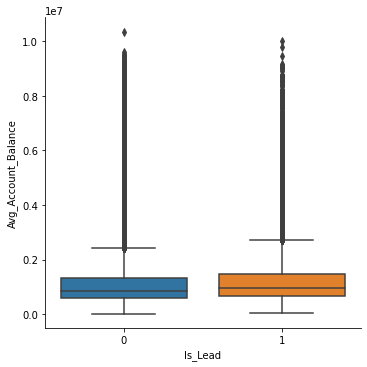

In [21]:
# Look at the differences between leads and non-leads in terms of average account balance
### Customers that have left have a higher monthly charge

sns.factorplot(x = 'Is_Lead', y = 'Avg_Account_Balance', data = dfmod,  kind="box")

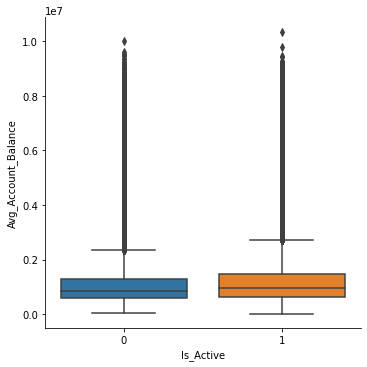

In [22]:
# Look at the differences between active and inactive clients in terms of average account balance 
### Customers that have left have a higher monthly charge

sns.factorplot(x = 'Is_Active', y = 'Avg_Account_Balance', data = dfmod,  kind="box")

In [23]:
#Takes too long
# Check the scatter plot of average account balance 
# plt.figure(figsize=(15, 5))
# plt.scatter(df['Avg_Account_Balance'], df['ID'], alpha=0.1)

<Figure size 1224x576 with 0 Axes>

<AxesSubplot:>

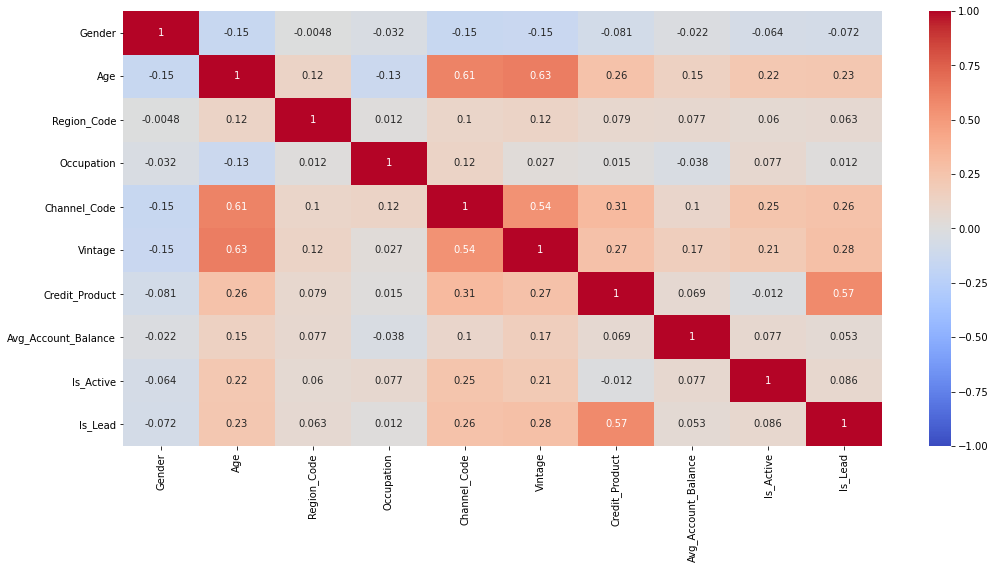

In [24]:
from sklearn.preprocessing import OrdinalEncoder

# Create an ordinal encoder and apply it to the dataframe
df_corr = dfmod.copy()
encoder = OrdinalEncoder()
for col in df_corr.columns:
    if dfmod[col].dtype == 'object':
        x = df_corr[col].values.reshape(-1, 1)
        df_corr[col] = encoder.fit_transform(x)
        
# Create a correlation heatmap to check correlation between all features
plt.figure(figsize=(17, 8))
sns.heatmap(df_corr.corr(), vmin=-1, cmap='coolwarm', annot=True)

Based on the heatmap, it seems that there is not a large correlation between any single feature and the target variable. 
The highest correlation is to credit product, but that by itself is not good enough.
Perhaps ML can extract a pattern by considering all factors together.

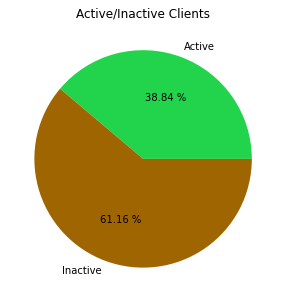

In [32]:
Active = dfmod.loc[dfmod['Is_Active'] == 1].count()[0]
Inactive= dfmod.loc[dfmod['Is_Active'] == 0].count()[0]

plt.figure(figsize=(8,5))

labels = ['Active', 'Inactive']
colors = ['#21D44B', '#9F6500']

plt.pie([Active, Inactive], labels = labels, colors=colors, autopct='%.2f %%')

plt.title('Active/Inactive Clients')

plt.show();

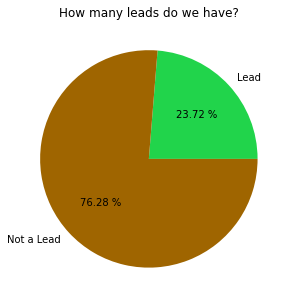

In [31]:
Active = dfmod.loc[dfmod['Is_Lead'] == 1].count()[0]
Inactive= dfmod.loc[dfmod['Is_Lead'] == 0].count()[0]

plt.figure(figsize=(8,5))

labels = ['Lead', 'Not a Lead']
colors = ['#21D44B', '#9F6500']

plt.pie([Active, Inactive], labels = labels, colors=colors, autopct='%.2f %%')

plt.title('How many leads do we have?')

plt.show();

In [34]:
dfmod.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,245725.0,4.538732e-01,0.497869,0.0,0.0,0.0,1.0,1.0
Age,245725.0,4.385631e+01,14.828672,23.0,30.0,43.0,54.0,85.0
Vintage,245725.0,4.695914e+01,32.353136,7.0,20.0,32.0,73.0,135.0
Credit_Product,245725.0,5.318669e-01,0.698332,0.0,0.0,0.0,1.0,2.0
Avg_Account_Balance,245725.0,1.128403e+06,852936.356069,20790.0,604310.0,894601.0,1366666.0,10352009.0
Is_Active,245725.0,3.883813e-01,0.487383,0.0,0.0,0.0,1.0,1.0
Is_Lead,245725.0,2.372083e-01,0.425372,0.0,0.0,0.0,0.0,1.0


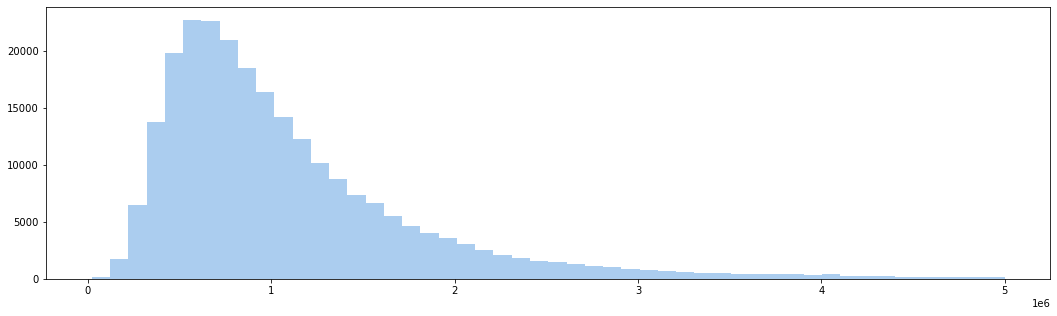

In [75]:
#Checking average account balances
#Unsure how to use this

# bins = [1000000,2000000,3000000,5000000]

plt.figure(figsize=(18,5))
# display(fifa.Overall.value_counts().sort_values())

plt.hist(df1.Avg_Account_Balance, bins=50, color='#abcdef')


# plt.xticks(bins)
# plt.yticks([600,1000])


# plt.ylabel('Number of Clients')
# plt.xlabel('Account Balance')
# plt.title('Average Client Monthly Account Balance')

# # plt.savefig('histogram.png', dpi=300)

plt.show();

In [43]:
dfmod.groupby("Is_Active").mean()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Lead
Is_Active,,,,,,
0,0.479347,41.271209,41.561674,0.538599,1.076315e+06,0.208151
1,0.413758,47.927291,55.459014,0.521266,1.210431e+06,0.282967


In [76]:
df1.groupby("Is_Lead").mean()

,Age,Vintage,Avg_Account_Balance
Is_Lead,,,
0,41.920131,41.853071,1.064763e+06
1,49.977704,63.111996,1.172077e+06


In [53]:
# # from sklearn.datasets import load_iris
# # iris = load_iris()
# # # print(iris)
# # features = iris.data.T
# # # display(type(iris),iris.data, iris.data.T)

# plt.scatter(features[0], features[1], alpha=0.2,
#             s=100*features[3], c=dfmod.Avg_Account_Balance, cmap='viridis')
# plt.xlabel(dfmod.Avg_Account_Balance[0])
# plt.ylabel(dfmod.Is_Active[1]);

In [62]:
# plt.rcParams['figure.figsize'] = [12, 5]

# # df1 = np.loadtxt("../../data/outlier_1d.txt")
# # df2 = np.loadtxt("../../data/outlier_2d.txt")
# # df3 = np.loadtxt("../../data/outlier_curve.txt")
# # print(df1.shape, df2.shape)

# plt.scatter(dfmod, np.random.normal(7, 0.2, size=dfmod.Avg_Account_Balance), s=1, alpha=0.5)
# # plt.scatter(df2[:, 0], df2[:, 1], s=5)
# plt.show();
# # plt.plot(df3[:, 0], df3[:, 1]);
# ;

In [64]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
# X = np.array(ct.fit_transform(X)) # __init__, fit, transform

NameError: name 'X' is not defined

In [66]:
df1 = df[df["Avg_Account_Balance"] <5000000]